In [207]:
import pandas as pd
import numpy as np
from IPython.display import  display,HTML
import seaborn as sns
import sys 
import os
%load_ext autoreload
%reload_ext autoreload

from src.utility import plotValueCounts,get_accuracy,get_f1_score,get_precision,plotBoxPlots,get_recall,get_auc
from src.config import TRAINING_FILE,MODELS,MODEL_TRAINING_FILE


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [208]:
credit_card_dataset = pd.read_csv(MODEL_TRAINING_FILE)

### Splitiing Data

In [209]:
from sklearn.model_selection import train_test_split


In [210]:
x =  ['Age', 'Debt', 'Ethnicity', 'Years Employed', 'Prior Default', 'Employed', 'Credit Score', 'Driving License', 'Income']

y = ['Approved']
# x = credit_card_dataset.columns[:len(credit_card_dataset.columns)-1]

In [211]:
xTrain, xTest, yTrain, yTest = train_test_split(credit_card_dataset[x], credit_card_dataset[y],test_size=0.30,random_state=2)

### Fitting models

In [213]:
result=pd.DataFrame(columns=["model","accuracy","precision","recall","f1-score","auc"])   
def store_results(modelName,yTest,ypred,result):
    result=result.append([{"model":str(modelName),"accuracy":get_accuracy(yTest,ypred),
                "precision":get_precision(yTest,ypred),"recall":get_recall(yTest,ypred),"f1-score":get_f1_score(yTest,ypred)}])
    return result

In [214]:
from sklearn.linear_model import LogisticRegression
result=pd.DataFrame(columns=["model","accuracy","precision","recall","f1-score"])

In [215]:
lr = LogisticRegression(random_state = 0)
lr.fit(xTrain, yTrain)
ypred=lr.predict(xTest)
print(metrics.f1_score(yTest,ypred))

0.8909952606635072


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [216]:
result=store_results("Logistic",yTest,ypred,result)


In [217]:
result

,model,accuracy,precision,recall,f1-score
0,Logistic,88.888889,88.679245,89.52381,89.099526


In [218]:
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])
print(round(precision_score(yTest,ypred)*100))

89


              precision    recall  f1-score   support

           0       0.89      0.88      0.89       102
           1       0.89      0.90      0.89       105

    accuracy                           0.89       207
   macro avg       0.89      0.89      0.89       207
weighted avg       0.89      0.89      0.89       207



<AxesSubplot:>

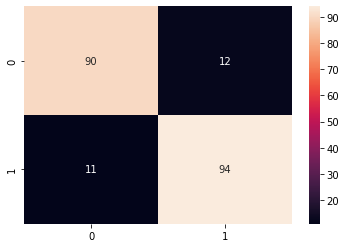

In [219]:
from sklearn.metrics import classification_report
print(classification_report(yTest,ypred))
sns.heatmap(confusion_matrix(yTest,ypred),annot=True)

In [220]:
print("Accuracy", metrics.accuracy_score(yTest, ypred)*100)

Accuracy 88.88888888888889


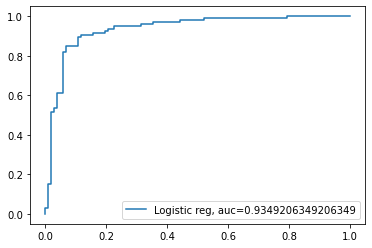

In [221]:
y_pred_proba = lr.predict_proba(xTest)[::,1]
fpr, tpr, _ = metrics.roc_curve(yTest,  y_pred_proba)
auc = metrics.roc_auc_score(yTest, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic reg, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [222]:
y_pred_proba = lr.predict_proba(xTest)[::,1]
auc = metrics.roc_auc_score(yTest, y_pred_proba)
result.loc[result.model=="Logistic",'auc']=auc*100

In [223]:
result.reset_index()

,index,model,accuracy,precision,recall,f1-score,auc
0,0,Logistic,88.888889,88.679245,89.52381,89.099526,93.492063


In [224]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0)
clf.fit(xTrain, yTrain)

testPred = clf.predict(xTest)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.89      0.83      0.86       102
           1       0.85      0.90      0.87       105

    accuracy                           0.86       207
   macro avg       0.87      0.86      0.86       207
weighted avg       0.87      0.86      0.86       207



<AxesSubplot:>

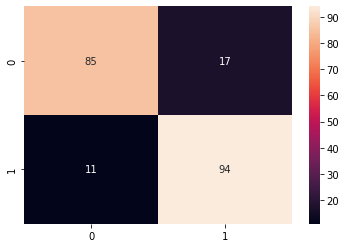

In [226]:
from sklearn.metrics import classification_report
print(classification_report(yTest,testPred))
sns.heatmap(confusion_matrix(yTest,testPred),annot=True)

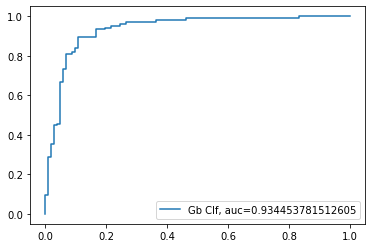

In [227]:
y_pred_proba_gb = clf.predict_proba(xTest)[::,1]
fpr, tpr, _ = metrics.roc_curve(yTest,  y_pred_proba_gb)
auc = metrics.roc_auc_score(yTest, y_pred_proba_gb)
plt.plot(fpr,tpr,label="Gb Clf, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [228]:
result=result.append([{"model":"GradientBoosting","accuracy":get_accuracy(yTest,testPred),
                "precision":get_precision(yTest,testPred),"recall":get_recall(yTest,testPred),"f1-score":get_f1_score(yTest,testPred)}])

In [229]:
result=store_results("GradienBoosting",yTest,testPred,result)

In [230]:
y_pred_proba_gb = clf.predict_proba(xTest)[::,1]
auc = metrics.roc_auc_score(yTest, y_pred_proba_gb)
result.loc[result.model=="GradienBoosting",'auc']=auc*100

In [231]:
result

,model,accuracy,precision,recall,f1-score,auc
0,Logistic,88.888889,88.679245,89.52381,89.099526,93.492063
0,GradientBoosting,86.473430,84.684685,89.52381,87.037037,NaN
0,GradienBoosting,86.473430,84.684685,89.52381,87.037037,93.445378


In [232]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',verbose=True, probability=True)

In [233]:
svc.fit(xTrain,yTrain)

[LibSVM]*
optimization finished, #iter = 237
obj = -132.000003, rho = 1.000341
nSV = 157, nBSV = 110
Total nSV = 157
*
optimization finished, #iter = 192
obj = -129.999994, rho = 1.000116
nSV = 161, nBSV = 113
Total nSV = 161
*
optimization finished, #iter = 212
obj = -125.999994, rho = 1.000345
nSV = 155, nBSV = 116
Total nSV = 155
*
optimization finished, #iter = 153
obj = -113.999988, rho = 1.000143
nSV = 142, nBSV = 93
Total nSV = 142
*
optimization finished, #iter = 142
obj = -116.000002, rho = 1.000224
nSV = 143, nBSV = 98
Total nSV = 143
*
optimization finished, #iter = 231


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear', probability=True, verbose=True)

obj = -153.999997, rho = -1.000033
nSV = 185, nBSV = 132
Total nSV = 185


In [234]:
y_pred_svm=svc.predict(xTest)

In [235]:
print(classification_report(yTest,y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       102
           1       0.92      0.85      0.88       105

    accuracy                           0.88       207
   macro avg       0.89      0.88      0.88       207
weighted avg       0.89      0.88      0.88       207



<AxesSubplot:>

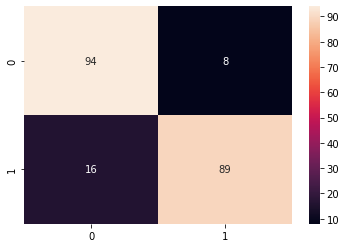

In [236]:

sns.heatmap(confusion_matrix(yTest,y_pred_svm),annot=True)

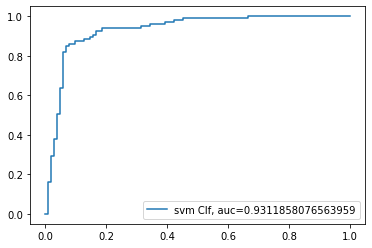

In [237]:
y_pred_proba_svm = svc.predict_proba(xTest)[::,1]
fpr, tpr, _ = metrics.roc_curve(yTest,  y_pred_proba_svm)
auc = metrics.roc_auc_score(yTest, y_pred_proba_svm)
plt.plot(fpr,tpr,label="svm Clf, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [238]:
result=store_results("SVM",yTest,y_pred_svm,result)

In [239]:
y_pred_proba_svm = svc.predict_proba(xTest)[::,1]
auc = metrics.roc_auc_score(yTest, y_pred_proba_svm)
result.loc[result.model=="SVM",'auc']=auc*100

In [240]:
result

,model,accuracy,precision,recall,f1-score,auc
0,Logistic,88.888889,88.679245,89.523810,89.099526,93.492063
0,GradientBoosting,86.473430,84.684685,89.523810,87.037037,NaN
0,GradienBoosting,86.473430,84.684685,89.523810,87.037037,93.445378
0,SVM,88.405797,91.752577,84.761905,88.118812,93.118581


### Storing Models

In [241]:
import pickle
# pickle.dump(pipe_svm, open('svm_singa.pkl', 'wb'))

In [242]:
def loadPickle(path):
    with open(path, "rb") as f:
        return pickle.load(f) 

In [243]:
def dumpPickle(model,name):
    pickle.dump(model, open(name+".pkl", 'wb'))

In [246]:
from sklearn import model_selection

In [247]:
credit_card_dataset['k-fold']=-1

In [248]:
credit_card_dataset = credit_card_dataset.sample(frac=1).reset_index(drop=True)

In [249]:
credit_card_dataset

,Unnamed: 0,Gender,Age,Debt,Married,Bank Customer,Education,Ethnicity,Years Employed,Prior Default,...,Married_encoded,Bank Customer_encoded,Education_encoded,Ethnicity_encoded,Prior Default_encoded,Employed_encoded,Driving License_encoded,Citizenship_encoded,Approved_encoded,k-fold
0,645,0,0.486449,-0.420887,0,0,4,0,-0.615536,1,...,1,0,2,7,0,0,1,0,1,-1
1,153,0,-0.716623,-0.454056,0,0,6,0,-0.340423,0,...,1,0,1,7,1,1,1,0,0,-1
2,403,1,-0.751238,-0.889271,0,0,1,0,-0.440600,1,...,1,0,10,7,0,0,0,2,1,-1
3,11,0,-0.139149,-0.587736,0,0,6,1,0.631441,0,...,1,0,1,3,1,0,0,0,0,-1
4,504,1,-0.237927,-0.202777,0,0,6,0,-0.340423,0,...,1,0,1,7,1,1,1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,96,0,-0.723377,-0.830974,1,1,11,0,-0.627497,0,...,2,2,0,7,1,0,0,0,1,-1
686,38,0,-0.322353,-0.839015,1,1,4,0,-0.590118,0,...,2,2,2,7,1,1,0,0,0,-1
687,158,0,-0.301247,-0.554567,0,0,5,1,0.580605,0,...,1,0,8,3,1,1,1,0,0,-1
688,91,0,-0.012510,2.159244,0,0,6,0,-0.515359,0,...,1,0,1,7,1,0,0,0,1,-1


In [250]:
kf=model_selection.KFold(n_splits=5)

In [256]:
for fold,(trn_,val_) in enumerate(kf.split(X=credit_card_dataset)):
    print(val_)
    print("*"*100)
    print(fold)
    credit_card_dataset.loc[val_,'k-fold'] = fold

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137]
****************************************************************************************************
0
[138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220

In [269]:
train=credit_card_dataset[credit_card_dataset['k-fold']!=1]

In [270]:
test=credit_card_dataset[credit_card_dataset['k-fold']==1]

In [271]:
from sklearn.ensemble import GradientBoostingClassifier

clf_ = GradientBoostingClassifier(random_state=0)
clf_.fit(train[final_features], train['Approved'])

testPred_ = clf.predict(test[final_features])

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        59
           1       0.97      0.99      0.98        79

    accuracy                           0.98       138
   macro avg       0.98      0.98      0.98       138
weighted avg       0.98      0.98      0.98       138



<AxesSubplot:>

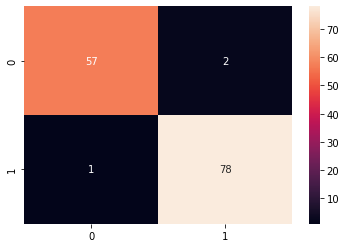

In [272]:
from sklearn.metrics import classification_report
print(classification_report(test['Approved'],testPred_))
sns.heatmap(confusion_matrix(test['Approved'],testPred_),annot=True)